In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Load Wine data set
wine_df = pd.read_csv("wine_data.csv")
# Show sample of data set
print(wine_df.head())

   OD_read  Proline
0     3.92   1065.0
1     3.40   1050.0
2     3.17   1185.0
3     3.45   1480.0
4     2.93    735.0


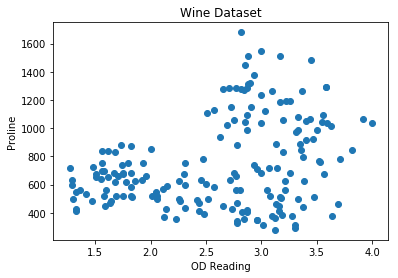

In [12]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [13]:
# Generate clusters from K-Means
km = KMeans(3)
km_clusters = km.fit_predict(wine_df) 
# Generate clusters using Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

In [5]:
db_param_options = [[20,5],[25,5],[30,5],[25,7],[35,7],[35,3]]
for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine_df)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Eps:  20 Min Samples:  5
DBSCAN Clustering:  0.3997987919957757
Eps:  25 Min Samples:  5
DBSCAN Clustering:  0.35258611037074095
Eps:  30 Min Samples:  5
DBSCAN Clustering:  0.43763797761597306
Eps:  25 Min Samples:  7
DBSCAN Clustering:  0.2711660466706248
Eps:  35 Min Samples:  7
DBSCAN Clustering:  0.4600630149335495
Eps:  35 Min Samples:  3
DBSCAN Clustering:  0.5368842164535846


In [36]:
# Generate clusters using DBSCAN
db = DBSCAN(eps=35, min_samples = 3)
db_clusters = db.fit_predict(wine_df)

In [40]:
db_clusters


array([ 0,  0,  1,  2,  3,  2,  4,  4,  0,  0,  2,  4,  4,  0,  2,  4,  4,
        0, -1,  0,  3,  3,  0,  0,  0,  0,  1,  4,  0,  0,  4,  2,  0,  4,
        0,  0,  0,  0,  0,  3,  3,  0,  0,  3,  0,  0,  0,  0,  0,  4,  0,
        4,  1, -1,  0,  0,  0,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  0,  3,  3,  0,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  0,  0,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  0,  0,  3])

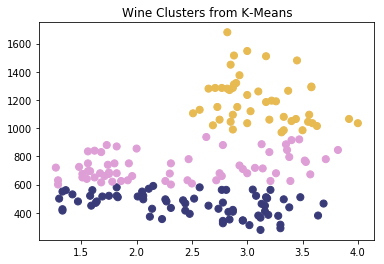

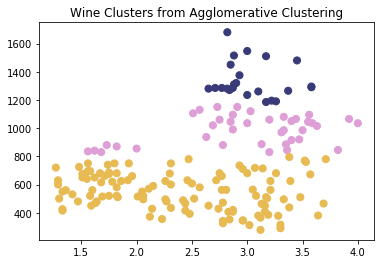

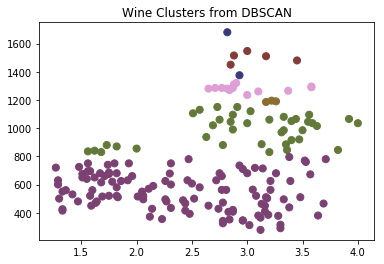

In [7]:
plt.title("Wine Clusters from K-Means")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=km_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=ac_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wine Clusters from DBSCAN")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=db_clusters,s=50, cmap='tab20b')
plt.show()


In [8]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))
print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.5809421087616886
Agg Clustering:  0.5988495817462
DBSCAN Clustering:  0.5368842164535846


In [41]:
import unittest
import numpy as np
class TestKMeansAgglomerativeClusteringDBSCAN(unittest.TestCase):
    def test_km(self):
        self.assertEqual(str(km),"KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,\n    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',\n    random_state=None, tol=0.0001, verbose=0)")
    def test_km_clusters(self):
        self.assertEqual(km_clusters.tolist(),[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])
    def test_ac(self):
        self.assertEqual(str(ac),"AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',\n            connectivity=None, linkage='average', memory=None,\n            n_clusters=3, pooling_func='deprecated')")
    def test_ac_clusters(self):
        self.assertEqual(ac_clusters.tolist(),[2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1])
    def test_db(self):
        self.assertEqual(str(db),"DBSCAN(algorithm='auto', eps=35, leaf_size=30, metric='euclidean',\n    metric_params=None, min_samples=3, n_jobs=None, p=None)")
    def test_db_clusters(self):
        self.assertEqual(db_clusters.tolist(),[ 0,  0,  1,  2,  3,  2,  4,  4,  0,  0,  2,  4,  4,  0,  2,  4,  4,
        0, -1,  0,  3,  3,  0,  0,  0,  0,  1,  4,  0,  0,  4,  2,  0,  4,
        0,  0,  0,  0,  0,  3,  3,  0,  0,  3,  0,  0,  0,  0,  0,  4,  0,
        4,  1, -1,  0,  0,  0,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  0,  3,  3,  0,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  0,  0,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  0,  0,  3])
        
        
        

In [42]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestKMeansAgglomerativeClusteringDBSCAN)
unittest.TextTestRunner(verbosity=2).run(suite)

test_ac (__main__.TestKMeansAgglomerativeClusteringDBSCAN) ... ok
test_ac_clusters (__main__.TestKMeansAgglomerativeClusteringDBSCAN) ... ok
test_db (__main__.TestKMeansAgglomerativeClusteringDBSCAN) ... ok
test_db_clusters (__main__.TestKMeansAgglomerativeClusteringDBSCAN) ... ok
test_km (__main__.TestKMeansAgglomerativeClusteringDBSCAN) ... ok
test_km_clusters (__main__.TestKMeansAgglomerativeClusteringDBSCAN) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.012s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>